In [1]:
# MULTICLASS CLASSIFICATION - BRFSS 
# Outcome variable: CHRONICGRP
# Final model: Random Forest Classifier
#
import time
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.base as skbase
import sklearn.metrics as smet
import sklearn.model_selection as ms

from sklearn.ensemble import RandomForestClassifier


In [2]:
np.set_printoptions(precision=3, suppress = True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import libraries

import importlib.util
spec = importlib.util.spec_from_file_location("manip", "/home/kylier/python/DS/manip.py")
manip = importlib.util.module_from_spec(spec)
spec.loader.exec_module(manip)

In [4]:
spec = importlib.util.spec_from_file_location("enrich", "/home/kylier/python/DS/enrich.py")
enrich = importlib.util.module_from_spec(spec)
spec.loader.exec_module(enrich)

In [25]:
spec = importlib.util.spec_from_file_location("enrich", "/home/kylier/python/DS/learn.py")
learn = importlib.util.module_from_spec(spec)
spec.loader.exec_module(learn)

In [6]:
# define columns to use
binary_columns = ["B_SMOKER", "B_HLTHPLN", "B_COUPLED", "B_VEGGIE", "B_EXERCISE", "B_EXER30", "B_SLEEPOK", "B_BINGER",
                  "B_CHECKUP", "B_GOODHLTH", "B_POORHLTH", "B_SEATBLT", "B_HIVRISK"]
label_columns = ["L_SEX", "L_AGE_G", "L_EMPLOY1", "L_INCOMG", "L_EDUCAG", "L_BMI5CAT", "L_IMPRACE"]
labeled_states = ["L_STATEAB"]
target = ["CHRONICGRP"]

In [7]:
# Use the full data set
raw_data = pd.read_csv('/home/kylier/python/DS/data/BRFSS_Clean_Combo.csv')

In [8]:
brfss = pd.DataFrame(raw_data, columns=binary_columns + label_columns + labeled_states + target)

In [9]:
brfss["CHRONICGRP"].value_counts()

0    734870
1    374149
2    135267
3     61434
Name: CHRONICGRP, dtype: int64

In [10]:
# Balance class representation by performing random sampling from each group with replacement
brfss = manip.rebalanceMulticlass(brfss, "CHRONICGRP", 4, [0, 1, 2, 3], 123)
brfss["CHRONICGRP"].value_counts()

3    326430
2    326430
1    326430
0    326430
Name: CHRONICGRP, dtype: int64

In [11]:
X, Y = enrich.prepareXY(brfss, "CHRONICGRP")
# Encode columns for analysis (uses category_encoders library)
X = manip.doCleanupEncode(X, binary=label_columns + labeled_states)
X_train, X_test, Y_train, Y_test = ms.train_test_split(X, Y, test_size=0.1)

In [12]:
# Show the final set of predictors
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305720 entries, 0 to 1305719
Data columns (total 40 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   B_SMOKER     1305720 non-null  int64
 1   B_HLTHPLN    1305720 non-null  int64
 2   B_COUPLED    1305720 non-null  int64
 3   B_VEGGIE     1305720 non-null  int64
 4   B_EXERCISE   1305720 non-null  int64
 5   B_EXER30     1305720 non-null  int64
 6   B_SLEEPOK    1305720 non-null  int64
 7   B_BINGER     1305720 non-null  int64
 8   B_CHECKUP    1305720 non-null  int64
 9   B_GOODHLTH   1305720 non-null  int64
 10  B_POORHLTH   1305720 non-null  int64
 11  B_SEATBLT    1305720 non-null  int64
 12  B_HIVRISK    1305720 non-null  int64
 13  L_SEX_1      1305720 non-null  int64
 14  L_SEX_2      1305720 non-null  int64
 15  L_AGE_G_1    1305720 non-null  int64
 16  L_AGE_G_2    1305720 non-null  int64
 17  L_AGE_G_3    1305720 non-null  int64
 18  L_EMPLOY1_1  1305720 non-null  int64
 19  

In [13]:
# Using the following parameters as determined by the tuning script: brfss_binary_tuning.py
# 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_depth': 10, 'criterion': 'gini'

In [14]:
rf = RandomForestClassifier(n_estimators=200, 
                            min_samples_split=10, 
                            min_samples_leaf=15, 
                            max_depth=10,                            
                            criterion='gini',  
                            max_samples=3300,
                            n_jobs=-1, 
                            verbose=1)

In [15]:
rf.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.3s finished


RandomForestClassifier(max_depth=10, max_samples=3300, min_samples_leaf=15,
                       min_samples_split=10, n_estimators=200, n_jobs=-1,
                       verbose=1)

In [16]:
rf.score(X_train, Y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    7.0s finished


0.44236981214281096

Feature: 0, Score: 0.02235
Feature: 1, Score: 0.00328
Feature: 2, Score: 0.02552
Feature: 3, Score: 0.01323
Feature: 4, Score: 0.01040
Feature: 5, Score: 0.01380
Feature: 6, Score: 0.01012
Feature: 7, Score: 0.00665
Feature: 8, Score: 0.03246
Feature: 9, Score: 0.22749
Feature: 10, Score: 0.12170
Feature: 11, Score: 0.01283
Feature: 12, Score: 0.00049
Feature: 13, Score: 0.02032
Feature: 14, Score: 0.01913
Feature: 15, Score: 0.01417
Feature: 16, Score: 0.01994
Feature: 17, Score: 0.02218
Feature: 18, Score: 0.00392
Feature: 19, Score: 0.03874
Feature: 20, Score: 0.04884
Feature: 21, Score: 0.06041
Feature: 22, Score: 0.01995
Feature: 23, Score: 0.01283
Feature: 24, Score: 0.01874
Feature: 25, Score: 0.00881
Feature: 26, Score: 0.01392
Feature: 27, Score: 0.01396
Feature: 28, Score: 0.01486
Feature: 29, Score: 0.01839
Feature: 30, Score: 0.03261
Feature: 31, Score: 0.00299
Feature: 32, Score: 0.00802
Feature: 33, Score: 0.00491
Feature: 34, Score: 0.01116
Feature: 35, Score: 0.01261
Fe

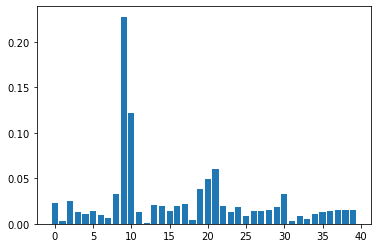

In [17]:
learn.showRFFeatures(rf)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.8s finished


AUC for Class 1, No Conditions: 0.8098238638942222
AUC for Class 2, 1 Condition: 0.622813093348209
AUC for Class 3, 2 Conditions: 0.6256164842710332
AUC for Class 4, 3+ Conditions: 0.7967831442749437


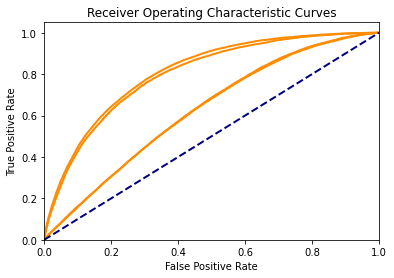

In [26]:
learn.multiclassROC(rf, X_test, Y_test, [0, 1, 2, 3], ['No Conditions', '1 Condition', '2 Conditions', '3+ Conditions'])